# Day 17: Set and Forget

https://adventofcode.com/2019/day/17

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from AOC2019 import Intcode, readIntcodeProg

In [40]:
prog = readIntcodeProg("input17.txt")

In [52]:
a = Intcode(prog,"ASCII")
icol = 0
irow = 0
matrix = []
row = []
while(not a.isHalted):
    a.runProgram(0)
    o = a.getLastOutput()
    if (o!=10): # 10 starts a new line
        print(chr(o),end="")
        # 35 means #, 46 means .
        if (o==35):
            row.append(1)
        elif (o==46):
            row.append(0)
        else:
            row.append(2)
    else:
        print("")
        if (len(row)):
            matrix.append(row)
        row = []

....#########......................................
....#.......#......................................
....#.......#......................................
....#.......#......................................
....#.......#......................................
....#.......#......................................
....###########....................................
............#.#....................................
............#.#....................................
............#.#....................................
............#######................................
..............#...#................................
..............#...#.....###########.........#######
..............#...#.....#.........#.........#.....#
..............#...#.....#.........#.........#.....#
..............#...#.....#.........#.........#.....#
..........###########...#.........#.........#.....#
..........#...#...#.#...#.........#.........#.....#
..........#...###########.........#.........#.....#
..........#.

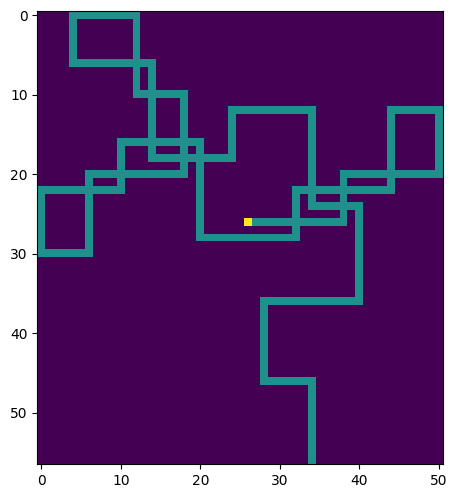

In [54]:
fig = plt.figure(figsize=(6, 6), dpi=100)
plt.imshow(matrix)

In [66]:
ncol = len(matrix)
nrow = len(matrix[0])
m = np.array(matrix)
ncross = 0
alignpar = 0
for j in range(1,ncol-1): # skip boards
    for i in range(1,nrow-1): # skip boards
        if m[j][i]==1: # scaffolding
            if m[j-1][i]==1 and \
               m[j+1][i]==1 and \
               m[j][i+1]==1 and \
               m[j][i-1]==1 : # crossing
                ncross += 1
                alignpar += i*j
print("Sum of alignment parameters =",alignpar, "(", ncross, "crossings )")

Sum of alignment parameters = 5948 ( 13 crossings )
